```{image} hca-logo.png
:width: 200px
:class: analytics-logo
```

# HCA DCP User Analytics - August vs July 2024

This section displays metrics collected from Google Analytics HCA DCP Data Portal and Data Browser and compares August 2024 with the previous month (July 2024). The generation of this report is now coded in Jupiter notebooks and can be rerun easily and modified or consolidated as desired. 


### Key to tables

On the tables:

* Diffs, e.g. <span style="color: green">(+19.04%)</span> or <span style="color: red">(-12.03%)</span>, compare the later month with the previous month.
* "+" Indicates the entry is new in the report in the current month.
* "↑" Indicates the entry has moved up in rank since the last month.
* "↓" Indicates the entry has moved down in rank since the last month.



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from IPython.display import display
import os
import pprint
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

%load_ext autoreload
%autoreload 2

import analytics.charts as ac
import analytics_hca as hca

GA_PROPERTY = "361323030" # data.humancellatlas.org - GA4
# DCP_ANALYTICS_START = "2019-03-01"
DCP_ANALYTICS_START = "2021-01-01"
TODAY = 'today'
PERIOD = "2024-08"
PREV_PERIOD = "2024-07"
SECRET_NAME = 'ANALYTICS_REPORTING_CLIENT_SECRET_PATH'

GA3_END = "2023-06-30"
GA4_START = "2023-07-01"


ImportError: cannot import name 'bigquery' from 'google.cloud' (unknown location)

In [ ]:
default_params = {
    "service_system": ac.authenticate_ga4(SECRET_NAME),
    "property": GA_PROPERTY,
    "index_key_formatter": hca.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD
}

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8083%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=f2Efvs3gawnte6WTonVQcPfEEB6Cny&access_type=offline


In [ ]:
ac.init_tables()

In [ ]:
# ga3_service_system = ac.authenticate_ga(SECRET_NAME)

In [ ]:
# ga3_users_over_time_params = {
#     "start_date": DCP_ANALYTICS_START,
#     "end_date": GA3_END,
#     "service_system": ga3_service_system,
#     "property": "185740629",
#     "segment": "gaid::q-RjXBSdQ-i18vXOOoXl5g"
# }
# 
# hca.save_ga3_users_over_time_data({}, {}, **ga3_users_over_time_params)

## User acquisition

### Monthly users and pageviews (all time)

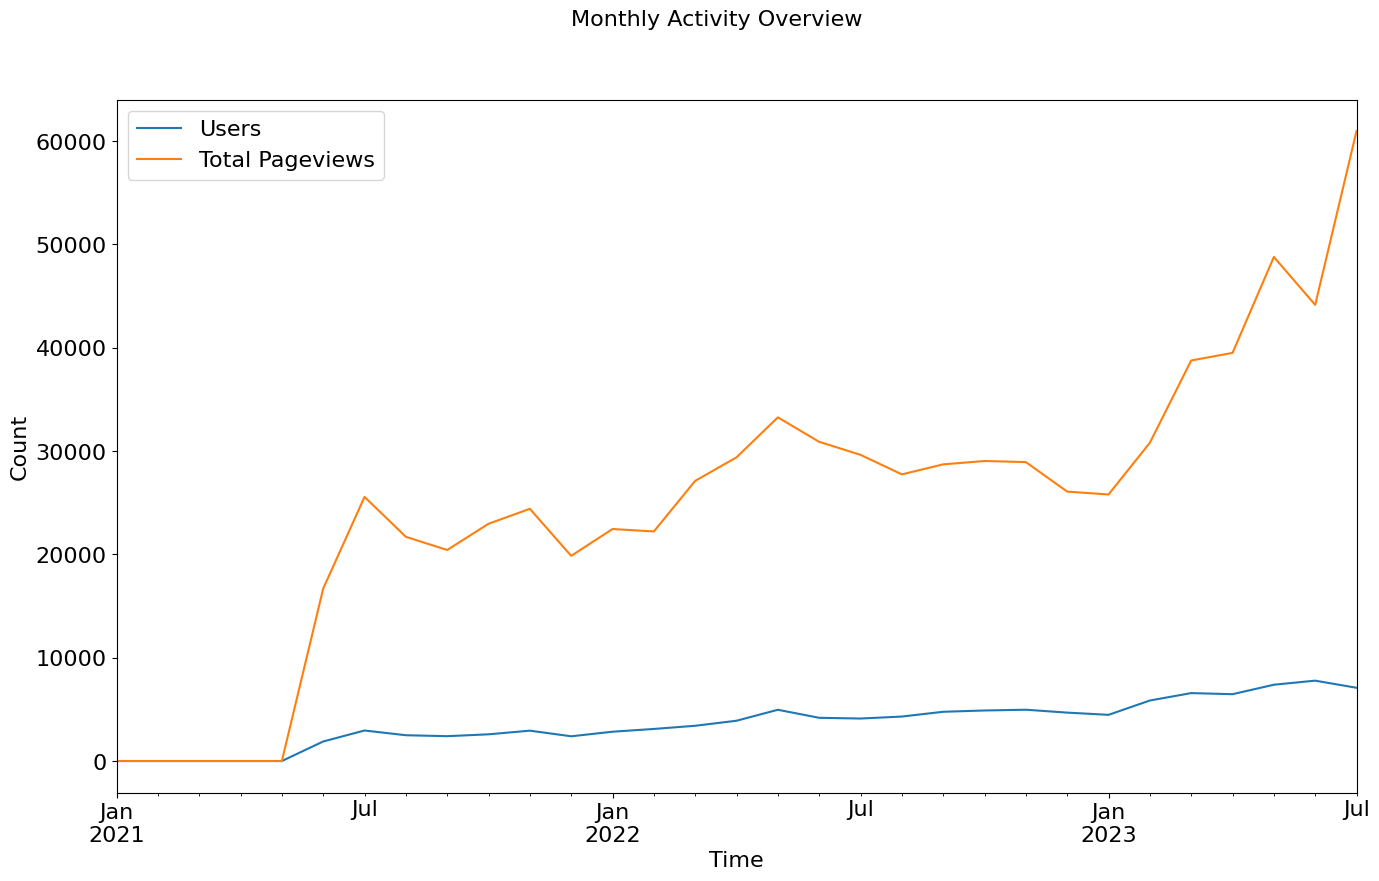

In [ ]:
users_over_time_table = hca.plot_users_over_time(start_date=GA4_START, end_date=TODAY, split_vertical=[37], **default_params)

<div style="page-break-after: always"></div>

### Total unique users and unique pageviews by month (all time)

In [ ]:
display(users_over_time_table)

### Users and sessions
Users are distinguished based on a tracking cookie set by Google. Because cookies may not remain present over time or between devices, it's likely that total users are overcounted and returning users are undercounted.

In [ ]:
ac.show_difference_table("Total Users", None, "totalUsers", None, **default_params)

In [ ]:
ac.show_difference_table("Returning Users", None, "totalUsers", None, dimension_filter="newVsReturning==returning", **default_params)

In [ ]:
ac.show_difference_table("Total Visits", None, "sessions", None, **default_params)

In [ ]:
ac.show_difference_table("Sessions Including Visits to Data Portal", None, "sessions", None, dimension_filter="pagePath!~/explore", **default_params)

In [ ]:
ac.show_difference_table("Sessions Including Visits to Data Browser", None, "sessions", None, dimension_filter="pagePath=~/explore", **default_params)

### Device category

In [ ]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "totalUsers", "deviceCategory", percentage_metrics={"totalUsers"}, **default_params)

### Social network referrers

In [ ]:
ac.show_difference_table("User Sessions", "Social Network", "sessions", "sessionSource", dimension_filter="sessionDefaultChannelGroup=@Organic Social", **default_params)

<div style="page-break-after: always"></div>

### Top referrers

In [ ]:
ac.show_difference_table("Users", "Referrer", "totalUsers","sessionSource", **default_params)

<div style="page-break-after: always"></div>

### Top countries

In [ ]:
ac.show_difference_table("Users", "Country", "totalUsers", "country", **default_params)

<div style="page-break-after: always"></div>

### Top entrances

In [ ]:
ac.show_difference_table("Entrances", "Page", "sessions", ["landingPage", "hostName"], dimension_filter="eventName==session_start", num_keep_dimensions=2, df_processor=hca.relative_url_index_processor("landingPage", "hostName"), **default_params)

## Downloads and exports
### Download project metadata

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Full Manifest", rows_type="fixed", **{**default_params, "index_key_formatter": (lambda x: "Download Project Full Metadata")})

### Top metadata downloads

In [ ]:
# ac.show_difference_table("Downloads", "Project", "ga:hits", "ga:dimension15", filters="ga:eventCategory==Project;ga:eventAction==Download Project Full Manifest", rows_limit=29, **{**default_params, "index_key_formatter": hca.format_project_id_key})

### Download project manifest

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Manifest", rows_type="fixed", **default_params)

### Download project matrix

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Download Type", ["ga:users", "ga:hits"], ["ga:dimension6", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Matrix", rows_type="fixed", **default_params)

### Request curl command for selected data

In [ ]:
# ac.show_difference_table(["Users", "Count"], "curl Request From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventAction==Request;ga:dimension1==Bulk Download", rows_type="fixed", **default_params)

### Metadata request/download from selected data

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Metadata Request/Download From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Manifest;ga:eventAction=~Request|Download;ga:dimension1=~Cohort Manifest|Cohort Manifest Link", rows_type="fixed", **default_params)

### Request export from selected data

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Request Export From Search Results", ["ga:users", "ga:hits"], ["ga:dimension3", "ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Export;ga:eventAction==Request;ga:dimension1==Cohort Export;ga:dimension3==Terra", rows_type="fixed", **default_params)

### Top direct file download file types (from files tab)

In [ ]:
# ac.show_difference_table("Downloads", "File Type", "ga:hits", "ga:dimension6", filters="ga:eventCategory==File;ga:eventAction==Download", **default_params)

### Direct file downloads (from files tab)

In [ ]:
# ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==File;ga:eventAction==Download", rows_type="fixed", **default_params)

### Top "export selected data" queries

In [ ]:
# ac.show_difference_table("Selected for Export Count", "Query", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~/explore/export/export-to-terra|/explore/export/get-curl-command|/explore/export/download-manifest", split_vertical=[7, 11, 7], **default_params)

## Entities
### Entity tabs selections (project, samples, files)

In [ ]:
# ac.show_difference_table("Count", "Entity Tab", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Entity;ga:eventAction==Select Tab", **default_params)

## Search facets
### Top facets

In [ ]:
# ac.show_difference_table("Count", "Facet", "ga:hits", "ga:dimension9", filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

### Top facet terms

In [ ]:
# ac.show_difference_table("Count", ["Facet", "Term"], "ga:hits", ["ga:dimension9", "ga:dimension10"], filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

<div style="page-break-after: always"></div>

## Projects
### Top project detail pages

In [ ]:
ac.show_difference_table("Count", "Project", "screenPageViews", ["pagePathPlusQueryString", "hostName"], dimension_filter="hostName==explore.data.humancellatlas.org;pagePathPlusQueryString=~^(\\/projects\\/[0-9a-fA-F]{8}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{12})(\\/?\\?{0}|\\/?\\?{1}.*)$", num_keep_dimensions=2, df_processor=hca.relative_url_index_processor("pagePathPlusQueryString", "hostName"), **default_params)

### Project detail supplementary links visits (from external resources)

In [ ]:
# ac.show_difference_table("Visits", "Link", "ga:hits", ["ga:dimension4", "ga:dimension6", "ga:eventLabel"], filters="ga:eventCategory==Project;ga:eventAction==View External Resource", **default_params)

### Withdrawn/deprecated projects visits

In [ ]:
# ac.show_difference_table("Count", "Project Type", "ga:hits", "ga:eventAction", filters="ga:eventAction=~View Deprecated Project|View Withdrawn Project", **default_params)

### Analysis protocol portal links

In [ ]:
# ac.show_difference_table("Count", "Analysis Protocol", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Portal Link;ga:eventAction==Click", **default_params)

<div style="page-break-after: always"></div>

## Data Portal
### Top landing pages

In [ ]:
ac.show_difference_table("Entrances", "Page", "sessions", ["landingPage", "hostName"], dimension_filter="eventName==session_start;hostName==data.humancellatlas.org", num_keep_dimensions=2, df_processor=hca.relative_url_index_processor("landingPage", "hostName"), **default_params)

<div style="page-break-after: always"></div>

### Top pages

In [ ]:
ac.show_difference_table("Count", "Path", "screenPageViews", ["pagePath", "hostName"], dimension_filter="hostName==data.humancellatlas.org", num_keep_dimensions=2, df_processor=hca.relative_url_index_processor("pagePath", "hostName"), **default_params)

### Top searches

In [ ]:
# ac.show_difference_table("Count", "Search Text", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Enter Text", **default_params)

### Top selected search results

In [ ]:
# ac.show_difference_table("Count", "Search Result", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Click", **default_params)

<div style="page-break-after: always"></div>